Importing libraries

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('myntra_products_catalog.csv')

In [13]:
df.head(5)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [15]:
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

PrimaryColor is the only column with null values.We can fill these null values with other

In [17]:
#Filling the null values in primarycolor with other
df['PrimaryColor'] = df['PrimaryColor'].fillna('Other')

In [18]:
#converting all letter to lowercase
#map() is a python method that applies a function element-wise to every value in the DataFrame.
df = df.map(lambda s:s.lower() if type(s) == str else s)

In [19]:
# removing leading trailing spaces in primarycolor
df['PrimaryColor'] = df['PrimaryColor'].str.lstrip()

Let us check the differrent brands available

In [21]:
print("various brands available : ", df['ProductBrand'].unique())

various brands available :  ['dkny' 'ethnovogue' 'spykar' 'raymond' 'parx' 'showoff' 'kenneth cole'
 'police' 'vishudh' 'being human' 'homesake' 'sej by nisha gupta'
 'yak yak' 'parfait' 'michael kors' 'highlander' 'jewel junction' 'id'
 'story@home' 'gini and jony' 'sera' 'accessher' 'alcis'
 'difference of opinion' 'tokyo talkies' 'anna sui' 'her by invictus'
 'soie' 'lara karen' 'urban dog' 'ahilya' 'vastramay' 'campus sutra'
 'fido dido' 'miah decor' 'buckleup' 'peter england' 'aigner' 'lady lyka'
 'park avenue' 'roadster' 'u.s. polo assn. denim co.' 'sweet dreams'
 'kazo' 'stylo bug' 'bvlgari' 'qraa men' 'gas' 'with' 'zush'
 'jbn creation' 'u.s. polo assn. kids' 'dressberry' 'colorplus' 'lakme'
 'allen solly woman' 'palm tree' 'arrow' 'david beckham' 'mango' 'carrera'
 'romee' 'tayhaa' 'ishin' 'shoe couture' 'harbornbay' 'keds' 'rozia'
 'aj dezines' 'monte carlo' 'even' 'ether' 'crimsoune club'
 'russell athletic' 'mimosa' 'puma' 'blackberrys' 'playdate' 'rocia'
 'marvel by wear y

In [22]:
number_of_unique_brands = len(df['ProductBrand'].unique())
print('Number_of_unique_brands =', number_of_unique_brands)

Number_of_unique_brands = 677


Let us check the diffent gender category

In [24]:
print('Different_gender_category:', df['Gender'].unique())

Different_gender_category: ['unisex' 'women' 'men' 'boys' 'girls' 'unisex kids']


Let us check the different colors available

In [26]:
print('Different primary colors available',df['PrimaryColor'].unique())

Different primary colors available ['black' 'beige' 'pink' 'blue' 'white' 'brown' 'burgundy' 'red' 'green'
 'other' 'maroon' 'navy' 'gold' 'yellow' 'grey' 'platinum' 'silver'
 'khaki' 'mustard' 'lavender' 'matte' 'rose' 'charcoal' 'purple' 'orange'
 'peach' 'magenta' 'bronze']


Let us check the price range available in myntra 

In [28]:
print('Max price: ', df['Price (INR)'].max())
print('Min price: ',df['Price (INR)'].min())
print('Average price: ', round(df['Price (INR)'].mean(),2))

Max price:  63090
Min price:  90
Average price:  1452.66


Data visualization

<Axes: title={'center': 'top 10 brands'}, xlabel='ProductBrand'>

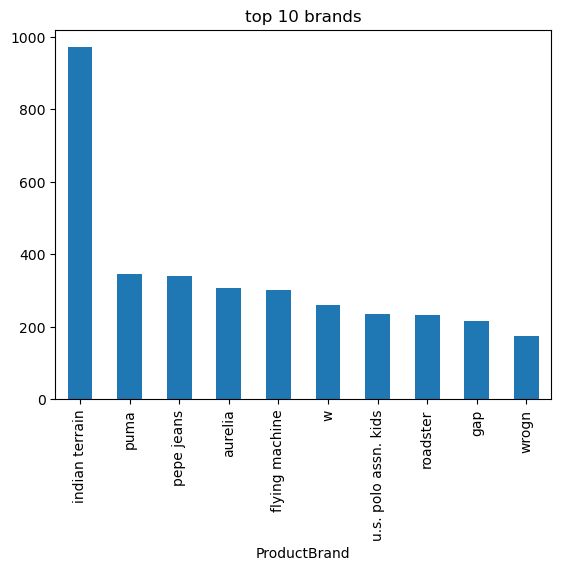

In [30]:
#Show top 10 popular brands

df['ProductBrand'].value_counts()[:10].plot(kind = 'bar', title = 'top 10 brands')

SELECT ProductBrand, COUNT(*) AS BrandCount
FROM YourTableName
GROUP BY ProductBrand
ORDER BY BrandCount DESC
LIMIT 10;

<Axes: ylabel='ProductID'>

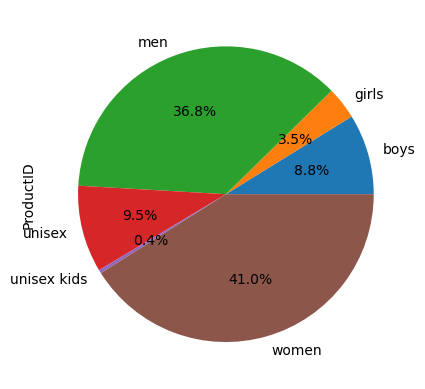

In [31]:
#available products with respect to gender

df.groupby('Gender')['ProductID'].count().plot.pie(autopct = "%1.1f%%") 

SELECT 
    Gender,
    COUNT(ProductID) AS ProductCount,
    (COUNT(ProductID) * 100.0 / SUM(COUNT(ProductID)) OVER ()) AS Percentage
FROM 
    your_table
GROUP BY 
    Gender;


<Axes: title={'center': 'preferred color'}, xlabel='PrimaryColor'>

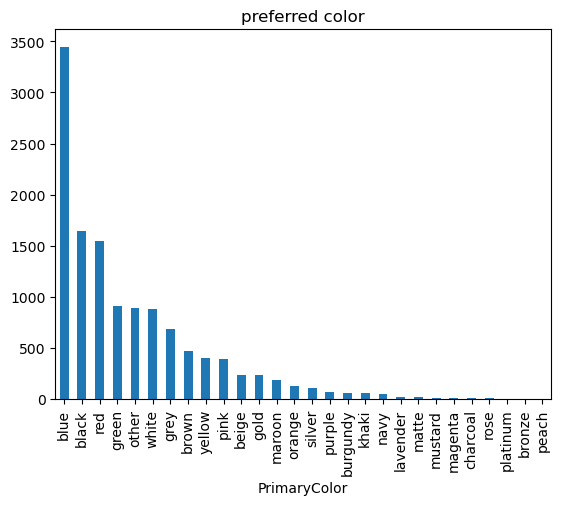

In [73]:
#most preferrrable color
df.groupby('PrimaryColor')['ProductID'].count().sort_values(ascending= 0).plot(kind ='bar', title ='preferred color')

SELECT 
    PrimaryColor, 
    COUNT(ProductID) AS ProductCount
FROM 
    Products
GROUP BY 
    PrimaryColor
ORDER BY 
    ProductCount DESC;